In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.randn(10000) # generate x data

In [3]:
noise = np.random.normal(0, 0.035, 10000) # generate noise

In [4]:
y = np.sin(x) + noise

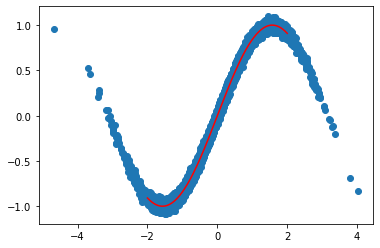

In [5]:
true_x = np.linspace(-2,2,1000)
true_y = np.sin(true_x)
plt.plot(x, y, 'o')
plt.plot(true_x, true_y, color='red')
plt.show()

In [6]:
# to split the data into training and testing set
indices = np.random.permutation(x.shape[0]) # to scramble the index
train_id, test_id = indices[0:7500], indices[7500:]
print(train_id)
print(test_id)
train_x, test_x = x[train_id], x[test_id]
train_y, test_y = y[train_id], y[test_id]

[8972 8997 7939 ... 8686 4543 1700]
[2482 6885 2624 ... 7609 3433 6650]


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

In [8]:
model = Sequential()
model.add(InputLayer(input_shape=(1)))
model.add(Dense(10, activation = 'tanh')) # to sum the weight multiply the tanh of the input -> extraxt features from tanh
model.add(Dense(100, activation = 'tanh')) # maybe to form a more complex features
model.add(Dense(1, activation='linear')) # to sum add the complex features
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


2023-05-23 19:18:20.768633: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(optimizer="SGD", loss="MeanSquaredError", metrics=["MeanSquaredError"])
history = model.fit(train_x, train_y, validation_data = (test_x, test_y), epochs=30)

2023-05-23 19:18:20.954946: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/30
235/235 [==============================] - 1s 2ms/step - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 2/30
235/235 [==============================] - 0s 527us/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 3/30
235/235 [==============================] - 0s 506us/step - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 4/30
235/235 [==============================] - 0s 513us/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 5/30
235/235 [==============================] - 0s 530us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 6/30
235/235 [==============================] - 0s 531us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0074 - val_mean_squared_error: 0.0074
Epoch 7/30
235/235

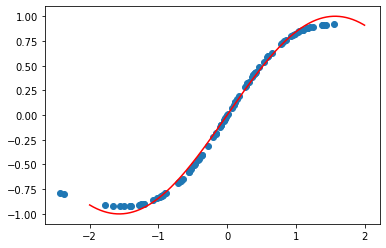

In [10]:
predict_x = np.random.randn(100)
prediction = model.predict(predict_x)
plt.plot(predict_x, prediction, 'o')
plt.plot(true_x, true_y, color='red')
plt.show()